In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/blackmamba-ops/Stellar-Classification/blob/main/Stellar_classification.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/blackmamba-ops/Tomato_vision.git">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>


# **Tomato Leaf Disease Classification**

-------

## **Introduction**

## **Model**

In [1]:
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize


In [2]:
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/Tomato/tomato/train"))
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/Tomato/tomato/test"))

['Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot', 'Tomato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight']
['Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy', 'Tomato___Target_Spot']


In [3]:
datadir = '/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/Tomato/tomato/train'

In [4]:
X_train = []
y_train = []
Categories = ['Tomato___Early_blight','Tomato___Tomato_mosaic_virus','Tomato___Target_Spot','Tomato___healthy','Tomato___Bacterial_spot']

for i in Categories:
  path = os.path.join(datadir,i)
  print(path)
  images = os.listdir(path)
  print(images)
  for img in images:
    img_path = os.path.join(path,img)
    img_arr = imread(img_path)
    img_resized = resize(img_arr,(150,150,3))
    X_train.append(img_resized)
    y_train.append(Categories.index(i))


/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/Tomato/tomato/train/Tomato___Early_blight
['Tomato___Early_blight_original_04747279-48b2-4ce1-932b-e511424beb6b___RS_Erly.B 8240.JPG_56846ec1-3844-433b-948e-13aa1497e02e.JPG', '9eec6625-b337-403b-b93c-e809f4e0b8c4___RS_Erly.B 7681.JPG', '19427ace-5a24-4e30-8a4d-228ab4a3b99b___RS_Erly.B 7403.JPG', '38b7f839-7d01-4062-a858-a64b841b7996___RS_Erly.B 7390.JPG', '4e3c2c95-69ca-41d4-9b08-4e0bb7f425eb___RS_Erly.B 7469.JPG', '4845b02b-1b59-454b-8aae-c4df6c02cbd8___RS_Erly.B 7660.JPG', '8eba4e89-f5bf-45d4-be9b-30dfde83f538___RS_Erly.B 7586.JPG', '9f98d981-b130-4238-aa34-21b0edfc1eaf___RS_Erly.B 7806.JPG', '325b9138-a030-4156-ae85-20de17e89f7e___RS_Erly.B 7807.JPG', '77c9e1e4-286a-4ae0-aa62-87f99781a6fa___RS_Erly.B 7864.JPG', '268590f4-68f6-4de9-968e-a7465b377db4___RS_Erly.B 7614.JPG', '2586a260-ecf6-40e8-aa11-4b8a50845575___RS_Erly.B 7833.JPG', '654d7c11-664e-47c0-a6aa-c5c45a07e386___RS_Erly.B 7799.JPG', '40b67c0a-5d

In [5]:
print(img_arr.shape)
print(img_resized.shape)

(256, 256, 3)
(150, 150, 3)


In [6]:
X_test=[]
y_test=[]
Categories = ['Tomato___Early_blight','Tomato___Tomato_mosaic_virus','Tomato___Target_Spot','Tomato___healthy','Tomato___Bacterial_spot']

datadir = "/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/Tomato/tomato/test"

for i in Categories:
  print('Loading..',i)
  path=os.path.join(datadir,i)
  images=os.listdir(path)
  for img in images:
    imgpath=os.path.join(path,img)
    img_arr=imread(imgpath)
    img_resize=resize(img_arr,(150,150,3))
    X_test.append(img_resize)
    y_test.append(Categories.index(i))
  print('Completed..',i)


Loading.. Tomato___Early_blight
Completed.. Tomato___Early_blight
Loading.. Tomato___Tomato_mosaic_virus
Completed.. Tomato___Tomato_mosaic_virus
Loading.. Tomato___Target_Spot
Completed.. Tomato___Target_Spot
Loading.. Tomato___healthy
Completed.. Tomato___healthy
Loading.. Tomato___Bacterial_spot
Completed.. Tomato___Bacterial_spot


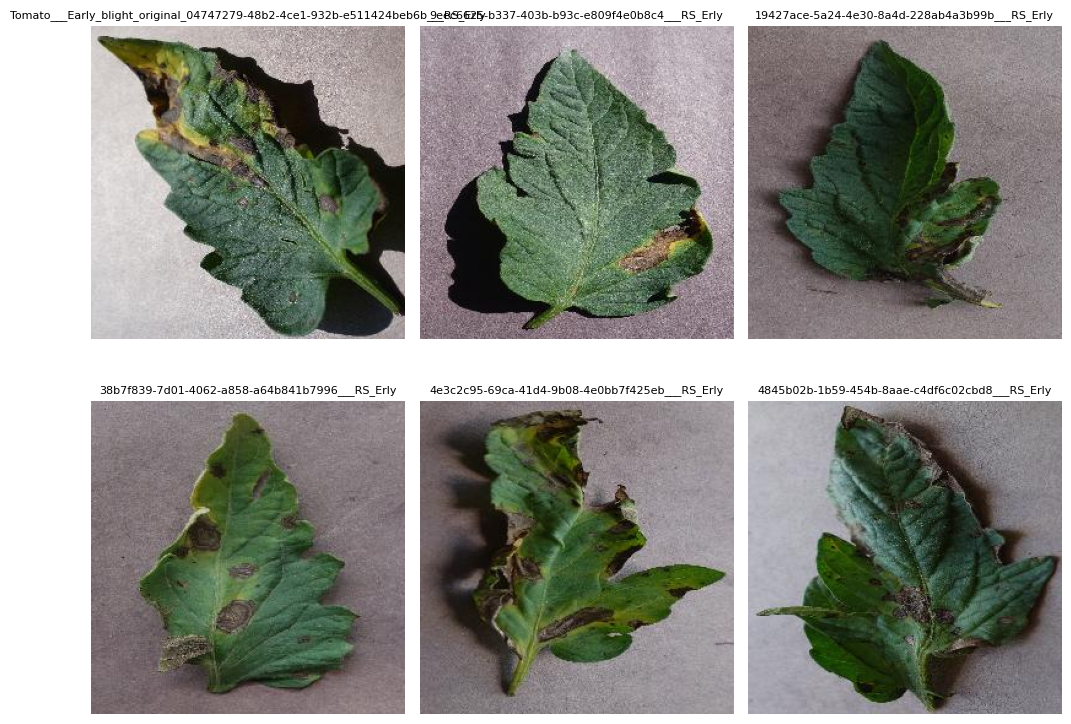

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/Tomato/tomato/train/Tomato___Early_blight"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # Adjust the figure size as needed

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image with reduced size
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img, extent=[0, 1, 0, 1])  # Set the extent to reduce image size
    ax.axis('off')
    ax.set_title(label, fontsize=8)  # Set the font size of the title
    ax.title.set_size(8)  # Another way to set the font size of the title

plt.tight_layout()
plt.show()


In [8]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5000, 150, 150, 3)
(5000,)
(500, 150, 150, 3)
(500,)


In [9]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Fit the data augmentation generator
# datagen.fit(X_train)



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model = Sequential()

# convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output before passing to dense layers
model.add(Flatten())

# fully connected layers
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train , y_train, epochs = 10,  batch_size = 20)

Epoch 1/10
250/250 [==============================] - 10s 17ms/step - loss: 0.7100 - accuracy: 0.7202
Epoch 2/10
250/250 [==============================] - 3s 13ms/step - loss: 0.2552 - accuracy: 0.9090
Epoch 3/10
250/250 [==============================] - 3s 12ms/step - loss: 0.1346 - accuracy: 0.9506
Epoch 4/10
250/250 [==============================] - 3s 12ms/step - loss: 0.1059 - accuracy: 0.9626
Epoch 5/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0582 - accuracy: 0.9812
Epoch 6/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0447 - accuracy: 0.9846
Epoch 7/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0598 - accuracy: 0.9810
Epoch 8/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0491 - accuracy: 0.9838
Epoch 9/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0423 - accuracy: 0.9856
Epoch 10/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0077 - accur

In [13]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 1s 8ms/step - loss: 0.2430 - accuracy: 0.9440


[0.24301977455615997, 0.9440000057220459]

In [14]:
model.save('Tomato_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


---------------------------------

## **Deployement through Local Tunnel**

In [15]:
!pip install flask pillow tensorflow
!npm install -g localtunnel


/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 1.063s


In [16]:
cd /content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project

/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project


In [21]:
port_no = 5000

In [22]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from tensorflow.keras.models import load_model
from skimage.transform import resize
import subprocess

app = Flask(__name__, template_folder='/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/templates')

# Load the machine learning model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/Tomato_model.h5')

@app.route("/")
def home():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
    if request.method == "POST":
        # Get the image file from the request
        file = request.files["file"]

        # Read the image file
        img = plt.imread(file)

        # Resize the image to match the input shape of the model
        img_resized = resize(img, (150, 150, 3))

        # Expand dimensions to match the input shape of the model
        img_resized = np.expand_dims(img_resized, axis=0)

        # Make prediction
        prediction = model.predict(img_resized)

        # Get the predicted class
        predicted_class = np.argmax(prediction)

        # Convert the predicted class to a Python int
        predicted_class = int(predicted_class)

        # Return the predicted class as JSON
        return jsonify({"predicted_class": predicted_class})

if __name__ == "__main__":
    # Start localtunnel to expose the Flask application
    lt_process = subprocess.Popen(["npx", "localtunnel", "--port", "5000"], stdout=subprocess.PIPE)

    # Get the public URL provided by localtunnel
    public_url = lt_process.stdout.readline().decode("utf-8").strip()
    print(f"To access the Global link, please click {public_url}")

    # Run the Flask application
    app.run()


To access the Global link, please click your url is: https://spotty-geckos-rest.loca.lt
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [5]:
import urllib.request

# Retrieve the public IP address
public_ip = urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n")

# Print the public IP address
print("Password/Endpoint IP for localtunnel is:", public_ip)


Password/Endpoint IP for localtunnel is: 34.32.196.15


In [ ]:
!npx localtunnel --port 5000

# **Deployement Through ngork**

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from tensorflow.keras.models import load_model
from skimage.transform import resize
from pyngrok import ngrok

app = Flask(__name__, template_folder='/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/templates')
ngrok.set_auth_token("Your ngork API here")

# Load the machine learning model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Luminar/CNN Image Classification Project/Tomato_model.h5')

@app.route("/")
def home():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
    if request.method == "POST":
        # Get the image file from the request
        file = request.files["file"]

        # Read the image file
        img = plt.imread(file)

        # Resize the image to match the input shape of the model
        img_resized = resize(img, (150, 150, 3))

        # Expand dimensions to match the input shape of the model
        img_resized = np.expand_dims(img_resized, axis=0)

        # Make prediction
        prediction = model.predict(img_resized)

        # Get the predicted class
        predicted_class = np.argmax(prediction)

        # Convert the predicted class to a Python int
        predicted_class = int(predicted_class)

        # Return the predicted class as JSON
        return jsonify({"predicted_class": predicted_class})

if __name__ == "__main__":
    public_url = ngrok.connect(5000).public_url
    print(f"To access the Global link, please click {public_url}")
    app.run()
